In [17]:
import numpy as np
import yfinance as yf
import statistics as st
import math
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

In [7]:
yf.pdr_override()

start = '2022-01-01'
end = '2022-12-30'
df = web.get_data_yahoo("ITSA4.SA", start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
df['ret'] = (df['Close'] - df['Close'].shift(-1)) / df['Close'].shift(-1)
df.dropna(inplace=True)

ret = df['ret']

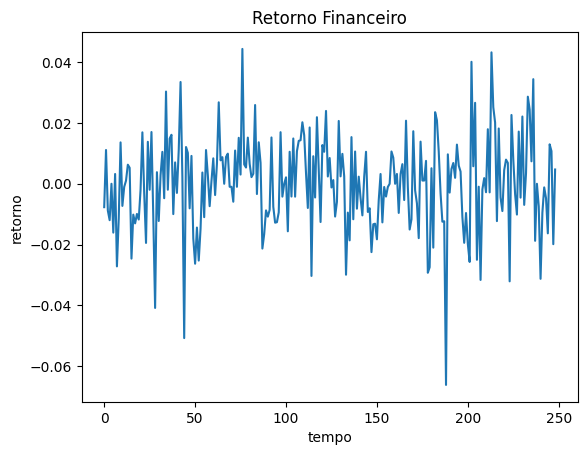

In [10]:
t = np.arange(0, len(df))

plt.title('Retorno Financeiro')
plt.xlabel('tempo')
plt.ylabel('retorno')
plt.plot(t, ret)
plt.show()

In [11]:
# Cenário Otimista e Pessimista
media = st.mean(ret)
desvio = st.stdev(ret)
otimista = media + 2 * desvio / math.sqrt(len(ret))
pessimista = media - 2 * desvio / math.sqrt(len(ret))

print(f"Retorno esperado em um cenário pessimista é de {pessimista}\n")
print(f"Retorno esperado em um cenário otimista é de {otimista}\n")

Retorno esperado em um cenário pessimista é de -0.0019725635754142307

Retorno esperado em um cenário otimista é de 0.0019089082301780153



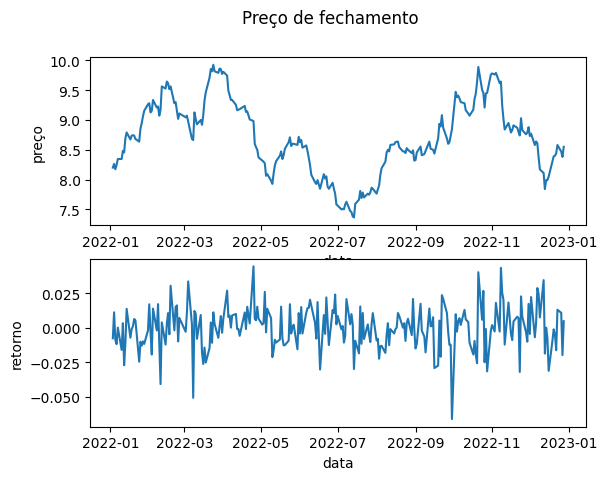

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Preço de fechamento')
ax1.set(xlabel='data', ylabel='preço')
ax1.plot(df.index, df['Close'])
ax2.set(xlabel='data', ylabel='retorno')
ax2.plot(df.index, df['ret'])

In [20]:
# Exercícios
math.pow(4,3) - math.pow(2,2)
math.sin(2) - math.cos(4.2)
math.cos(math.sin(3.7) - math.tan(1.3))
26 % 4
math.radians(46.2)
math.degrees(3.1)
x = 3
y = 6
math.e**x - math.log(y)
x*y**2 + y*math.cos(x)
math.sqrt(x/y+math.log(x+y)+math.tan(x))
num=[3,3,4,1,2,1,1,2,3,4,4,1,1,5,2]
num[1:3]
num[4:9]
num[1:]
num
num[::3]
num[-1]
num[-3:]
num[:4]
len(num)
num.count(1)

bolsas=['dow','ibov','ftse','dax','nasdaq','cac']
bolsas[:3]
bs=['hong kong', 'merval']
bolsas.extend(bs)
bolsas
bolsas.index('nasdaq')
bolsas[4]
bolsas.remove('cac')
bolsas.insert(2, 'sp&500')
bolsas

with open('bov.txt', 'w') as f:
    f.write('petr4 28.4\nvale3 31.3\nggbr4 15.76')
with open('bov.txt', 'r') as f:
    print(f.read())

lista=[2,2,3,3,3,-1,-1,-2,0,0,0,2,4,5,1,2,2,0,0,0,2,1,5,5,7,6,5,0,0]
sum(lista)
max(lista)
min(lista)
st.mean(lista)
st.median(lista)
st.mode(lista)
st.stdev(lista)
st.pstdev(lista)
lista.count(0)
lista.count(5)
lista.sort()
lista
lista.reverse()
lista

df = pd.read_excel('petr-ggbr.ods', engine='odf', index_col='Data')

petr4 = np.array(df['PETR4'].str.replace(',', '.').astype(float))
ggbr4 = np.array(df['GGBR4'].str.replace(',','.').astype(float))

df[['PETR4', 'GGBR4']] = df[['PETR4', 'GGBR4']].apply(lambda x : x.str.replace(',', '.')).astype(float)

df[['PETR4_perc', 'GGBR4_perc']] = df[['PETR4', 'GGBR4']].pct_change()

ret_petr4 = (petr4[1:len(petr4)] - petr4[:len(petr4) - 1]) / petr4[:len(petr4) - 1]
ret_ggbr4 = (ggbr4[1:len(ggbr4)] - ggbr4[:len(ggbr4) - 1]) / ggbr4[:len(ggbr4) - 1]

ret_petr4[0:10]

petr4 28.4
vale3 31.3
ggbr4 15.76


array([ 0.00239234, -0.00447494, -0.0323644 ,  0.01052958, -0.02114618,
        0.02128992, -0.00674433, -0.00216049, -0.01113517,  0.00688145])

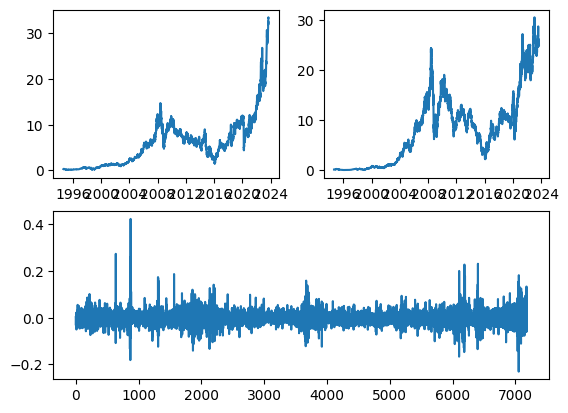

In [21]:
plt.subplot(221)
plt.plot(df.index, petr4)

plt.subplot(222)
plt.plot(df.index, ggbr4)

plt.subplot(212)
plt.plot(np.arange(len(ret_petr4)), ret_petr4)
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_3460\1411319272.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


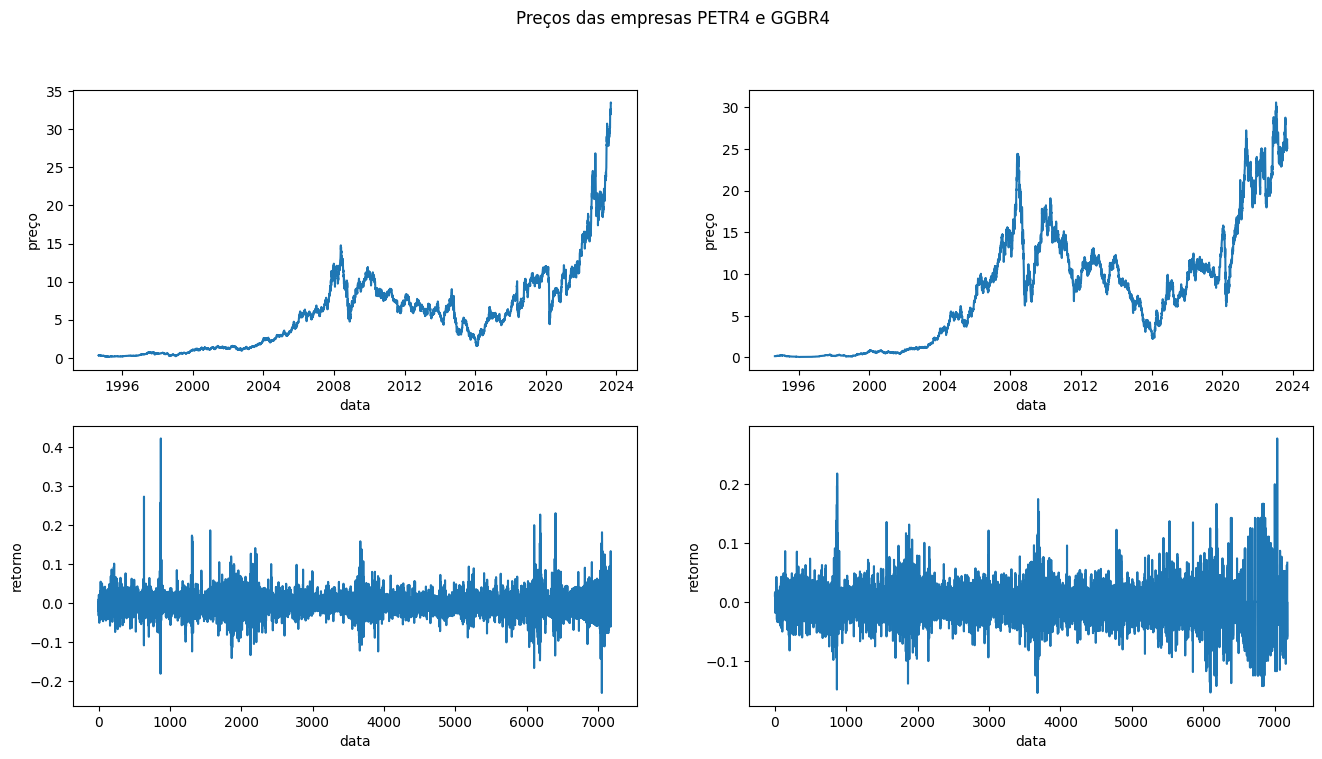

In [22]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
fig.suptitle("Preços das empresas PETR4 e GGBR4")
axs[0, 0].set(xlabel='data', ylabel='preço')
axs[0, 0].plot(df.index, petr4)

axs[0, 1].set(xlabel='data', ylabel='preço')
axs[0, 1].plot(df.index, ggbr4)

axs[1, 0].set(xlabel='data', ylabel='retorno')
axs[1, 0].plot(np.arange(0,len(ret_petr4)), ret_petr4)

axs[1, 1].set(xlabel='data', ylabel='retorno')
axs[1, 1].plot(np.arange(0,len(ret_ggbr4)), ret_ggbr4)
fig.show()